In [1]:
!pip install celluloid

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from scipy.special import gamma, psi as digamma
Pi = lambda z: gamma(z+1)
diPi = lambda z: digamma(z+1)

### Harmonic Series

wikipedia: https://en.wikipedia.org/wiki/Harmonic_series_(mathematics)

The n-th harmonic number is the sum of the reciprocals of the first n natural numbers  
$$H_{n} = 1+\frac{1}{2}+\frac{1}{3}+\cdots+\frac{1}{n} = \sum_{k=1}^{n}\frac{1}{k}$$
the harmonic series does not have a finite limit: it is a divergent series
<br>
<br>
<br>
The values of the sequence $H_{n} − \ln n$ decrease monotonically towards the limit  
$$\lim_{n \to \infty}(H_{n} - \ln n) = \gamma$$
where $\gamma \approx 0.5772156649$ is the Euler–Mascheroni constant.
<br>
<br>
<br>
Relation to diPi function
$$H_{n} = \psi(n) + \gamma $$
where $\psi(n)$ is the logarithmic derivative of Gauss's Pi function

#### approximating $H_{x}$ for a complex number x

[Asymptotic formulation](https://en.wikipedia.org/wiki/Harmonic_number#Alternative,_asymptotic_formulation)
$$H_{x} = x\sum_{k=1}^{\infty}\frac{1}{k(x+k)}$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


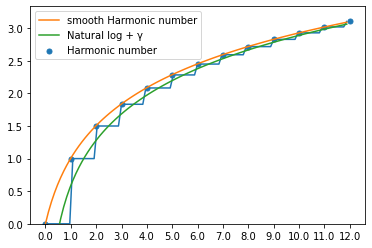

In [3]:
n_terms = 12

# only works for ints
H = lambda n: sum([1/i for i in range(1,n+1)])

# works for real and complex values
def H_asymp(x, n=999):
  sum_ = 0
  for i in range(1,n+1): sum_ += 1/(i*(x+i))
  return x*sum_

# H_asymp = lambda x,n=999: x * sum([1/(i*(x+i)) for i in range(1,n+1)])

inp = np.linspace(0,n_terms,100)
H_num = [H(int(np.floor(x))) for x in inp]
H_smooth = [H_asymp(x) for x in inp]
H_log = np.log(inp) + np.euler_gamma


plt.scatter(np.linspace(0,100,n_terms+1), [H(i) for i in range(0,n_terms+1)], s=25, label='Harmonic number')
plt.plot(H_num)
plt.plot(H_smooth, label='smooth Harmonic number')
plt.plot(H_log, label='Natural log + γ')
plt.xticks(ticks=np.linspace(0,100,n_terms+1), labels=np.round(np.linspace(0,n_terms+1,n_terms+2),1))
plt.ylim(bottom=0)
plt.legend()
plt.show()

#### approximating the [Euler–Mascheroni constant](https://en.wikipedia.org/wiki/Euler%27s_constant)

$$\lim_{n \to \infty}(H_{n} - \ln n) = \gamma = \int_{1}^{\infty}\frac{1}{\lfloor x \rfloor} - \frac{1}{x}$$

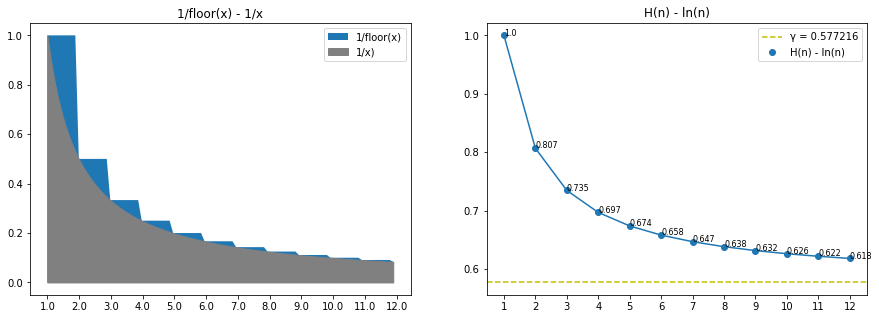

In [4]:
n_terms = 12

H = lambda n: sum([1/i for i in range(1,n+1)])

fig, axs = plt.subplots(1,2, figsize=(15,5))

inp = np.linspace(1,n_terms,100)
Hns = [1/np.floor(i) for i in inp]
lns = [1/i for i in inp]

plt.axes(axs[0])
plt.title('1/floor(x) - 1/x')
#plt.bar(x=np.linspace(1,100,n_terms),height=Hns, width=99/(n_terms-1), align='edge', zorder=0)
plt.fill_between(range(len(inp)), Hns, label='1/floor(x)')
plt.xticks(ticks=np.linspace(0,100,n_terms), labels=np.round(np.linspace(1,n_terms,n_terms),1))
#plt.plot(lns, c='yellow')
plt.fill_between(range(len(inp)), lns, color='gray', label='1/x)')
plt.legend()


inp = range(1,n_terms+1)
Hns = [H(i) for i in range(1,n_terms+1)]
lns = [np.log(i) for i in inp]
diffs = [Hn-ln for Hn,ln in zip(Hns,lns)]

plt.axes(axs[1])
plt.title('H(n) - ln(n)')
plt.plot(diffs)
plt.scatter(range(len(diffs)),diffs, label='H(n) - ln(n)')
for i, diff in enumerate(diffs): plt.annotate(np.round(diff,3), (i,diffs[i]), fontsize=8)
plt.xticks(ticks=range(n_terms), labels=range(1,n_terms+1))
plt.axhline(y=np.euler_gamma, color='y', linestyle='--', label=f'γ = {np.round(np.euler_gamma,6)}')
plt.legend()

plt.show()

### DiPi function

plotting the logarithmic derivative of Gauss's Pi(z) which is basically [Digamma](https://en.wikipedia.org/wiki/Digamma_function)(z+1)

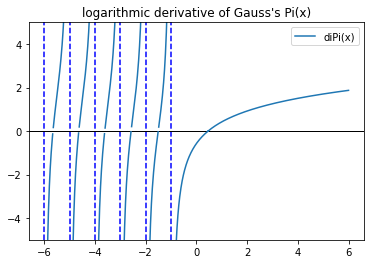

In [5]:
x = np.linspace(-6,6,1000)
y = diPi(x)

signchange = lambda x: np.where(x[:-1] * x[1:] < 0 )[0] +1

pos = signchange(y)
x[pos], y[pos] = np.nan, np.nan

for i in range(-6,0): plt.axvline(x=i, color='b', ls='--')
plt.axhline(y=0, color='k', lw=1)
plt.ylim(-5,5)

plt.plot(x,y, label='diPi(x)')
plt.title("logarithmic derivative of Gauss's Pi(x)")
plt.legend()
plt.show()

In [6]:
# from PIL import Image
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv

In [7]:
# define size
# using top left and bottom right coordinates
img_size = ((0,0),(512,512))
plot_size = ((-6,-6),(6,6))
(plot_x0,plot_y0), (plot_x1,plot_y1) = plot_size
(img_x0,img_y0), (img_x1,img_y1) = img_size

# define parameters
plot_xStep = (plot_x1-plot_x0)/(img_x1-img_x0)
plot_yStep = (plot_y1-plot_y0)/(img_y1-img_y0)
params = {"plot_xStep":plot_xStep, "plot_yStep":plot_yStep} 

#### using loops

iterating over rows and columns of the image

slow approach

In [8]:
def plotToImg(plot_size,img_size,point):
  (plot_x0,plot_y0), (plot_x1,plot_y1) = plot_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size
  img_x1 -= 1;  img_y1 -= 1

  x0, y0 = point
  x1 = round((x0-plot_x0)*(img_x1-img_x0)/(plot_x1-plot_x0) + img_x0)
  y1 = round((y0-plot_y0)*(img_y0-img_y1)/(plot_y1-plot_y0) + img_y1)
  return x1,y1

def plot_func(plot_size,img_size,params):

  (plot_x0,plot_y0), (plot_x1,plot_y1) = plot_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size
  img_w = img_x1 - img_x0
  img_h = img_y1 - img_y0

  #img = Image.new('HSV', (img_w, img_h), (0,0,0))
  img = np.zeros((img_w, img_h, 3))
  for x in tqdm(np.arange(plot_x0, plot_x1+params["plot_xStep"], params["plot_xStep"])):    # have added step size to endpoints to include them
    for y in np.arange(plot_y0, plot_y1+params["plot_xStep"], params["plot_yStep"]):

      z = x+y*1j

      z = diPi(z)
      if np.isnan(z): z=0
      
      # color depends on the angle of the roots
      angle = ( (0 + np.angle(z, deg=True)) %360)/360   # [0,1]
      h = angle
      s = 1

      z_max = abs(diPi(5+5j))
      z_bound = z_max/6

      # some approaches to domain coloring
      # v = abs(z)
      # v = (abs(z)**.5)*(z_max**0.5)
      v = np.log(1+abs(z))*(z_max/np.log(1+z_max))

      v = ((v % z_bound)/z_bound)
      v = 0.5 + 0.5*v
      # Plot the point
      #img.putpixel( plotToImg(plot_size,img_size,(x, y)), (h,s,v) )
      img[ plotToImg(plot_size,img_size,(x, y)) ] = h,s,v

  # use transpose not swapaxes because strides are also reversed
  return hsv_to_rgb(img).transpose(1,0,2)

#### using np arrays

working with all grid indices simultaneously

fast approach

In [9]:
def plot_func(plot_size,img_size,params, returnVals=False):

  (plot_x0,plot_y0), (plot_x1,plot_y1) = plot_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size
  img_w = img_x1 - img_x0
  img_h = img_y1 - img_y0

  #img = Image.new('HSV', (img_w, img_h), (0,0,0))
  img = np.zeros((img_w, img_h, 3))

  x = np.arange(plot_x0, plot_x1+params["plot_xStep"], params["plot_xStep"])
  y = np.arange(plot_y0, plot_y1+params["plot_xStep"], params["plot_yStep"])
  xx, yy = np.meshgrid(x,y)
  zz = xx + yy*1j
  zz = diPi(zz)
  zz[np.isnan(zz)] = 0

  # color depends on the angle of the roots
  angle = ( (0 + np.angle(zz, deg=True)) %360)/360   # [0,1]
  h = angle
  s = np.ones_like(zz, dtype=float)

  # v = 0.5 * abs(zz)
  v = np.log(1 + abs(zz))
  v = v / (5 + v)  # [0,1]

  # parameter to control the number of waves
  z_bound = 0.03
  v = ((v % z_bound)/z_bound)
  v = 0.5 + 0.5*v # [0,1] -> [0.5,1]
  
  img = np.dstack((h,s,v))  
  return hsv_to_rgb(img) if not returnVals else (zz, hsv_to_rgb(img))

In [10]:
img = plot_func(plot_size,img_size,params)
# plt.imshow(img)   # uncomment to see raw img

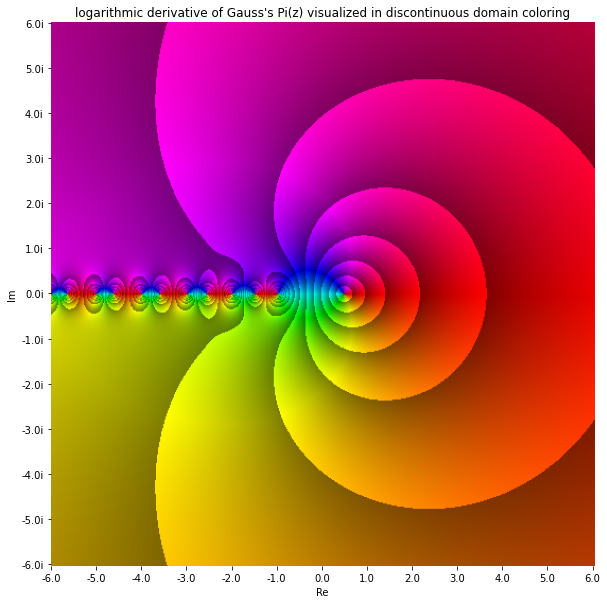

In [11]:
dpi = plt.rcParams['figure.dpi'] # get the default dpi value
dpi=50
fig_size = np.array(img.shape[:2])//dpi # figure size

fig, ax = plt.subplots(figsize=fig_size)
ax.imshow(img)

# xlen = 2*len(ax.get_xticks())
# ylen = 2*len(ax.get_yticks())
xlen, ylen = 12, 12

xlen += (xlen+1)%2; ylen += (ylen+1)%2
xticks = np.linspace(img_x0,img_x1-1,xlen)
yticks = np.linspace(img_y0,img_y1-1,ylen)
xlabels = np.round(np.linspace(plot_x0,plot_x1,xlen),2)
ylabels = np.round(np.linspace(plot_y1,plot_y0,ylen),2)
ylabels = [str(l)+'i' for l in ylabels]

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_title("logarithmic derivative of Gauss's Pi(z) visualized in discontinuous domain coloring")

ax.set_frame_on(False)

#### animate the waves

In [12]:
from celluloid import Camera
from matplotlib import animation

##### constant waves

In [26]:
camera = Camera(fig)
hsv_img = rgb_to_hsv(img)

for i in tqdm(range(150)):

  x = hsv_img.copy()
  x[:,:,2] = 0.5 + (x[:,:,2]-(i/149)) % 0.5

  # x[:,:,2] = 0.5 + (x[:,:,2]-(2*(i//2)/149)) % 0.5  # 2x laggier
  # x[:,:,2] = 0.5 + (x[:,:,2]-(2*i/149)) % 0.5  # 2x faster

  # other options to change speed speed:
  # - increase/decrease the fps when saving the animation
  # - increase/decrease the number frames by increasing the range

  x = hsv_to_rgb(x)

  ax.imshow(x)
  camera.snap()

my_animation = camera.animate(interval=30, repeat=False)  # interval affects dislpay animation speed

  0%|          | 0/150 [00:00<?, ?it/s]

In [27]:
my_animation.save('waves_constant.gif', writer=animation.PillowWriter(fps=30))  # fps affects saved animation speed
#my_animation.save('waves_constant.mp4', writer=animation.FFMpegWriter(fps=30))

##### gradual waves

In [ ]:
zz, img = plot_func(plot_size,img_size,params, returnVals=True)
z_max = np.max(abs(zz))

camera = Camera(fig)
hsv_img = rgb_to_hsv(img)
ln_scale = lambda x, x_max: np.log(1+x)*(x_max/np.log(1+x_max))

for i in tqdm(range(401)):
  
  if i<200:
    j = i
  elif i<400:
    j = i%200
    j = 200 - j*0.55
  else:
    j = 200
    j = 200 - j*0.55  

  x = ln_scale(j,200)
  x = ln_scale(x,200)
  z_bound = 1 - 0.99*(x/200)

  v = abs(zz)
  v = v / (10 + v)  # [0,1]

  v = (v % z_bound) / z_bound
  v = 0.5 + 0.5*v

  x = hsv_img.copy()
  x[:,:,2] = v
  x = hsv_to_rgb(x)

  ax.imshow(x)
  camera.snap()

my_animation = camera.animate(interval=30, repeat=False)

  0%|          | 0/401 [00:00<?, ?it/s]

In [ ]:
my_animation.save('waves_gradual.gif', writer=animation.PillowWriter(fps=30))
#my_animation.save('waves_gradual.mp4', writer=animation.FFMpegWriter(fps=30))

### Random harmonic series

In [ ]:
from sklearn.neighbors import KernelDensity

In [ ]:
N = 1000000
sums = []

for _ in tqdm(range(N)):
  n = 1000
  x = 2*np.random.randint(0,2,n)-1
  y = np.arange(1,n+1)
  x = x / y
  sums.append(x.sum())

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
sums = np.array(sums).reshape(-1,1)
kde = KernelDensity(bandwidth=0.2, kernel='gaussian')
kde.fit(sums)

KernelDensity(bandwidth=0.2)

In [ ]:
x = np.linspace(-4,4,100)[:, None]
scores = np.exp(kde.score_samples(x))

1) using binning
i) probability at +/- 1
density at -0.996: 0.241
density at 1.01: 0.241
avg density: 0.241

ii) probability at +/- 2
density at -1.99: 0.129
density at 2.0: 0.124
avg density: 0.126

2) using kernel density estimation
i) probability at +/- 1
density at -1: 0.239
density at 1: 0.24
avg density: 0.24

ii) probability at +/- 2
density at -2: 0.125
density at 2: 0.125
avg density: 0.125



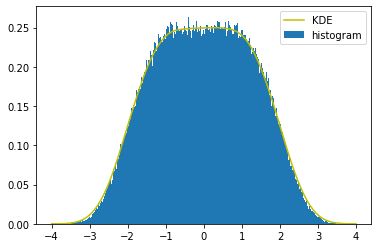

In [ ]:
bins = 1000
weights = np.ones_like(sums)/(len(sums)/bins)
hist_vals, hist_bins, hist_patches = plt.hist(sums, bins=bins, density=True, label='histogram')

first = lambda list_, cond: next((indx, item) for indx, item in enumerate(list_) if cond(item))

def print_density_bins(at, hist_bins, hist_vals):
  indx, val = first(hist_bins, lambda x: x>-at)
  dens1 = hist_vals[indx]
  print(f'density at {val:.3}: {dens1:.3}')

  indx, val = first(hist_bins, lambda x: x>=at)
  dens2 = hist_vals[indx]
  print(f'density at {val:.3}: {dens2:.3}')

  print(f'avg density: {(dens1+dens2)/2:.3}', end='\n\n')


def print_density_kde(at, kde):
  dens1 = np.exp(kde.score_samples([[-at]]))[0]
  dens2 = np.exp(kde.score_samples([[at]]))[0]
  print(f'density at {-at}: {dens1:.3}')
  print(f'density at {at}: {dens2:.3}')

  print(f'avg density: {(dens1+dens2)/2:.3}', end='\n\n')

print('1) using binning')
print('i) probability at +/- 1')
print_density_bins(1, hist_bins, hist_vals)
print('ii) probability at +/- 2')
print_density_bins(2, hist_bins, hist_vals)

print('2) using kernel density estimation')
print('i) probability at +/- 1')
print_density_kde(1, kde)
print('ii) probability at +/- 2')
print_density_kde(2, kde)

plt.plot(x[:,0],scores, c='y', label='KDE')
plt.legend()
plt.show()